## 1. Deskripsi Dataset

In [ ]:
# 1. Mount Google Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import requirements library

#mengolah dataset
import pandas as pd

#fungsi matematis
import numpy as np

#membuat graph
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd. read_csv("/content/drive/MyDrive/Colab Notebooks/Attack_Dataset.csv")

# Dataset from https://www.kaggle.com/datasets/tannubarot/cybersecurity-attack-and-defence-dataset

In [ ]:
data.head()

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA",NaN
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN
2,3,Error-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when an attacker intentiona...,"SQLMap, Burp Suite, Manual Browser Testing, Havij",1. Identify Input Points:Attacker finds a fiel...,"Web Applications, Login Forms, URL Parameters,...",Error message exposure due to lack of input va...,T1190 – Exploit Public-Facing Application,"Information disclosure, Database structure exp...",Review and monitor error logsEnable generic er...,Turn off detailed error messages in production...,#SQLInjection #ErrorLeakage #WebAppSecurity #O...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN
3,4,Blind SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In Blind SQL Injection, the attacker doesn’t s...","SQLMap, Burp Suite, sqlninja, Manual Browser T...",1. Find a User Input Point:Attacker finds a pl...,"Web Applications, Login Pages, Search Fields, ...","No error messages, but user input is still pas...",T1190 – Exploit Public-Facing Application,Slow and stealthy data theftFull database comp...,Monitor for slow and repetitive requestsAnalyz...,Use parameterized queries (prepared statements...,#BlindSQLi #TimeBasedSQLi #WebAppSecurity #OWA...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger, SQ...",NaN
4,5,Second-Order SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In a Second-Order SQL Injection, the attacker ...","Burp Suite, SQLMap, Postman, Browser Dev Tools...",1. Identify Stored Input Fields:The attacker l...,"Web Applications, User Registration Forms, Pro...",Trusting previously stored unvalidated data in...,T1505.003 – SQL Injection,Delayed data theftUnexpected system behaviorSe...,Log monitoring for delayed query failuresTrack...,Sanitize and validate inputs both at entry and...,#SecondOrderSQLi #DelayedInjection #StoredInje...,"OWASP, MITRE ATT&CK, PortSwigger Academy, Acun...",NaN


In [ ]:
# get the shape of the dataset
baris, kolom = data.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 14133
kolom: 16


In [ ]:
# get statistical summary
data.describe()

,ID
count,14133.000000
mean,7067.000000
std,4079.990012
min,1.000000
25%,3534.000000
50%,7067.000000
75%,10600.000000
max,14133.000000


In [ ]:
display(data[['Title', 'Attack Type']].head()) #ini hpus aja kah? #iya wes

,Title,Attack Type
0,Authentication Bypass via SQL Injection,SQL Injection (SQLi)
1,Union-Based SQL Injection,SQL Injection
2,Error-Based SQL Injection,SQL Injection
3,Blind SQL Injection,SQL Injection
4,Second-Order SQL Injection,SQL Injection


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14133 entries, 0 to 14132
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    14133 non-null  int64 
 1   Title                 14133 non-null  object
 2   Category              14133 non-null  object
 3   Attack Type           14133 non-null  object
 4   Scenario Description  14133 non-null  object
 5   Tools Used            14119 non-null  object
 6   Attack Steps          14133 non-null  object
 7   Target Type           14129 non-null  object
 8   Vulnerability         14115 non-null  object
 9   MITRE Technique       14109 non-null  object
 10  Impact                14130 non-null  object
 11  Detection Method      14129 non-null  object
 12  Solution              14130 non-null  object
 13  Tags                  14130 non-null  object
 14  Source                13973 non-null  object
 15  Unnamed: 15           46 non-null   

DATA CLEANING

In [ ]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_data[missing_data['Missing Count'] > 0])

                  Missing Count  Missing Percentage
Unnamed: 15               14087           99.674521
Source                      160            1.132102
MITRE Technique              24            0.169815
Vulnerability                18            0.127361
Tools Used                   14            0.099059
Target Type                   4            0.028303
Detection Method              4            0.028303
Impact                        3            0.021227
Tags                          3            0.021227
Solution                      3            0.021227


In [ ]:
columns_to_drop = [col for col in data.columns if 'Unnamed' in col or data[col].isnull().sum() > len(data)*0.8]
if columns_to_drop:
    data = data.drop(columns=columns_to_drop)
print(f"Kolom yang di-drop: {columns_to_drop}")


Kolom yang di-drop: ['Unnamed: 15']


In [ ]:
duplicate_count = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")
if duplicate_count > 0:
    data = data.drop_duplicates()
    print("✅ Data duplikat telah dihapus")

Jumlah data duplikat: 0


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna('Unknown')

print("✅ Data cleaning selesai!")
print(f"Dataset final shape: {data.shape}")

✅ Data cleaning selesai!
Dataset final shape: (14133, 15)


In [ ]:
# Cek apakah masih ada missing values
print("🔍 Cek missing values setelah cleaning:")
missing_after = data.isnull().sum()
print(missing_after[missing_after > 0])

print(f"\n📊 Total missing values tersisa: {data.isnull().sum().sum()}")

🔍 Cek missing values setelah cleaning:
Series([], dtype: int64)

📊 Total missing values tersisa: 0


**EXPLORATORY DATA ANALYSIS**

In [ ]:

print("🎯 ANALISIS ATTACK TYPE:")
attack_type_counts = data['Attack Type'].value_counts().head(10)
print("Top 10 Attack Types:")
print(attack_type_counts)

🎯 ANALISIS ATTACK TYPE:
Top 10 Attack Types:
Attack Type
Hardware Interface Exploitation    161
Wireless Attacks (Advanced)         95
Dependency Confusion                91
Fuzzer Configuration                75
Malicious Libraries                 74
Malicious Library                   71
Privilege Escalation                61
Removable Media Attack              55
Misuse of Legitimate Tools          55
Data Exfiltration                   52
Name: count, dtype: int64


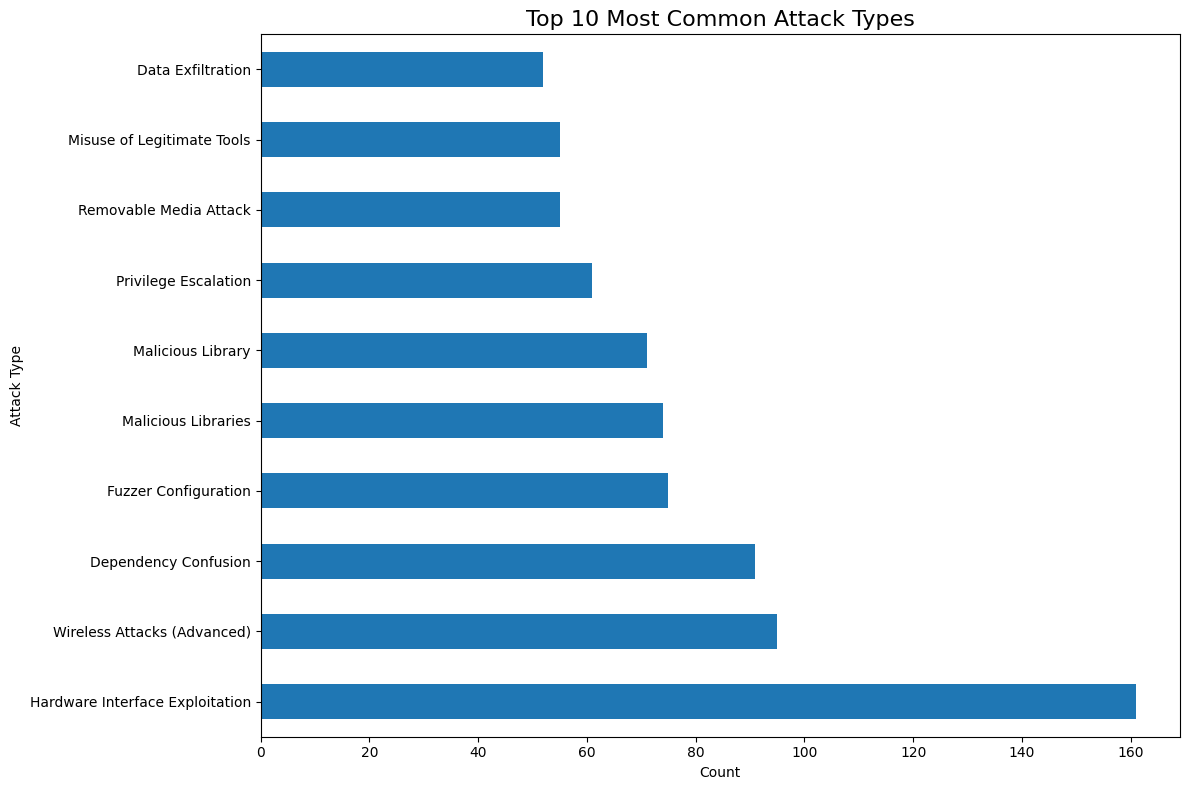

In [ ]:
# Ambil 10 attack types paling banyak
top_attacks = data['Attack Type'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_attacks.plot(kind='barh')  # Horizontal bar lebih bagus
plt.title('Top 10 Most Common Attack Types', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

In [ ]:
print("ANALISIS TARGET TYPE:")
target_type_counts = data['Target Type'].value_counts()
print("Distribusi Target Type:")
print(target_type_counts)



🎯 ANALISIS TARGET TYPE:
Distribusi Target Type:
Target Type
Windows                             291
Workstation                         109
Satellite                            78
Endpoint                             50
Android App                          46
                                   ... 
Cybersecurity Agents with LLM         1
Identity Management Agents            1
Document Generators, UI Mocks         1
Email/Message Generation Systems      1
Agents with Memory Systems            1
Name: count, Length: 9886, dtype: int64


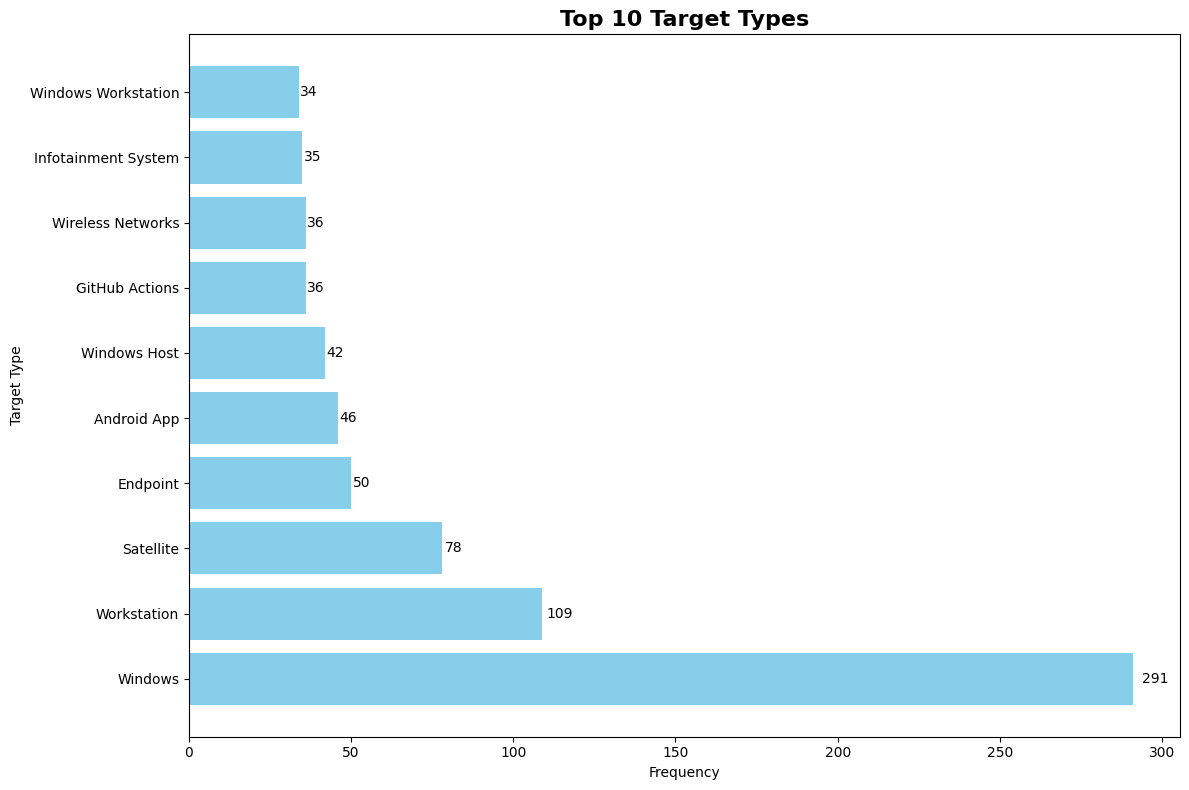

In [ ]:
target_counts = data['Target Type'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(target_counts.index, target_counts.values, color='skyblue')
plt.title('Top 10 Target Types', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Target Type')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

In [ ]:
print("ANALISIS TOOLS USED:")
# Karena tools bisa berupa list, kita split dan hitung
all_tools = []
for tools in data['Tools Used'].dropna():
    if pd.notna(tools):
        tools_list = str(tools).split(',')
        all_tools.extend([tool.strip() for tool in tools_list])

tools_series = pd.Series(all_tools)
top_tools = tools_series.value_counts().head(10)
print("Top 10 Tools:")
print(top_tools)

ANALISIS TOOLS USED:
Top 10 Tools:
Burp Suite    1117
Wireshark      711
Python         507
curl           486
Postman        289
PowerShell     265
bash           251
Scapy          234
Browser        196
PyTorch        190
Name: count, dtype: int64


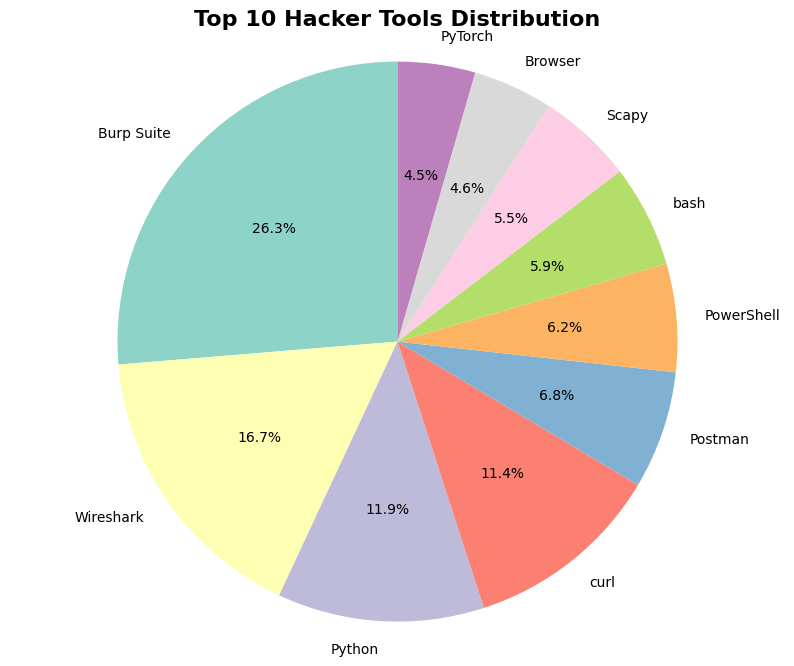

In [ ]:
all_tools = []
for tools in data['Tools Used']:
    if isinstance(tools, str) and tools != 'Unknown':
        tool_list = [tool.strip() for tool in tools.split(',')]
        all_tools.extend(tool_list)

# Count tools
tools_series = pd.Series(all_tools)
top_tools = tools_series.value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(range(len(top_tools)))
plt.pie(top_tools.values, labels=top_tools.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Top 10 Hacker Tools Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

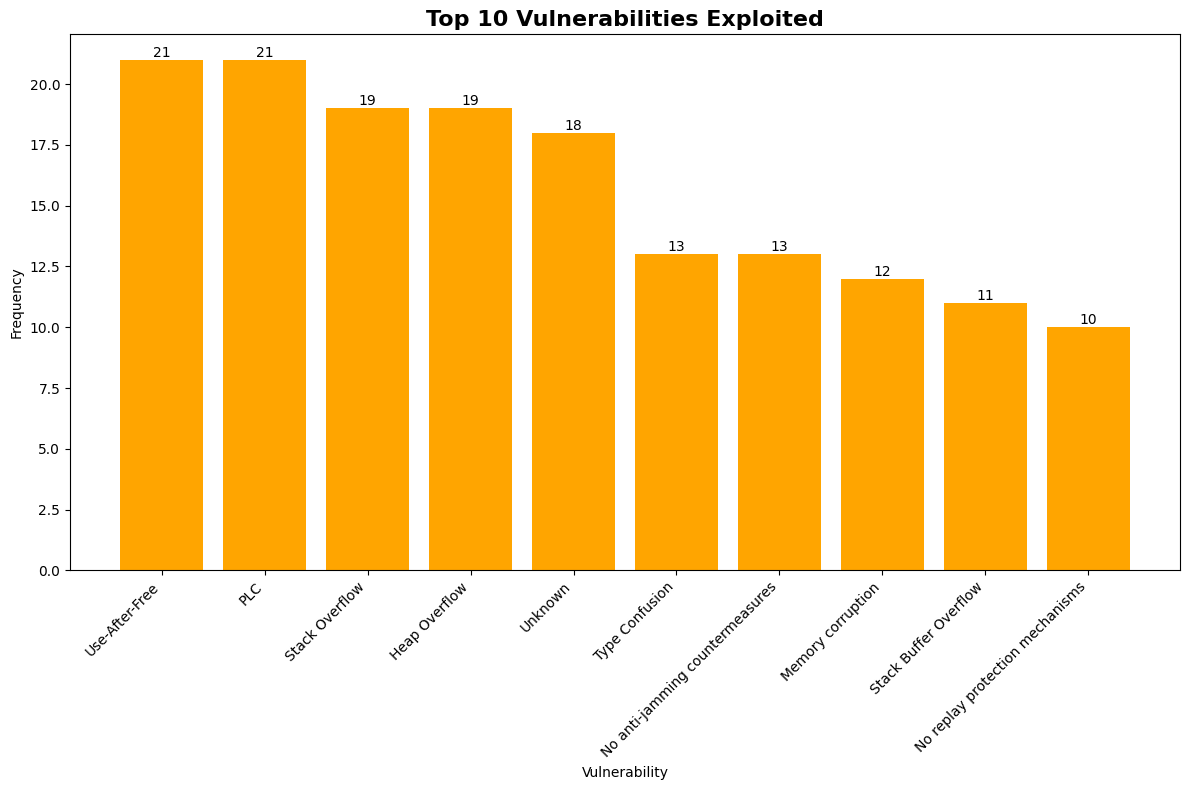

In [ ]:
# Analysis
vuln_counts = data['Vulnerability'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 8))
bars = plt.bar(vuln_counts.index, vuln_counts.values, color='orange')
plt.title('Top 10 Vulnerabilities Exploited', fontsize=16, fontweight='bold')
plt.xlabel('Vulnerability')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
top_attacks = data['Attack Type'].value_counts().head(15).index # Increased from 8 to 15
top_vulns = data['Vulnerability'].value_counts().head(15).index # Increased from 8 to 15

# Filter data
filtered_df = data[data['Attack Type'].isin(top_attacks) &
                data['Vulnerability'].isin(top_vulns)]

# Create heatmap data
heatmap_data = pd.crosstab(filtered_df['Attack Type'], filtered_df['Vulnerability'])

# Check if heatmap_data is empty
if heatmap_data.empty:
    print("No overlapping attack types and vulnerabilities found in the top selections.")
else:
    # Visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='d',
                cbar_kws={'label': 'Frequency'})
    plt.title('Attack Type vs Vulnerability Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Vulnerability')
    plt.ylabel('Attack Type')
    plt.tight_layout()
    plt.show()

    # Find hottest combo
    max_combo = heatmap_data.stack().idxmax()
    max_value = heatmap_data.stack().max()
    print(f"Hottest combo: {max_combo[0]} + {max_combo[1]} ({max_value} cases)")

No overlapping attack types and vulnerabilities found in the top selections.


In [ ]:
print("ANALISIS CATEGORY:")
category_counts = data['Category'].value_counts()
print("Distribusi Category:")
print(category_counts)

ANALISIS CATEGORY:
Distribusi Category:
Category
Insider Threat                                           569
Physical / Hardware Attacks                              548
Quantum Cryptography & Post-Quantum Threats              542
Wireless Attacks (Advanced)                              535
Malware & Threat                                         528
                                                        ... 
Automotive / CPS → Sensor Spoofing                         7
Automotive / CPS → Firmware Over-The-Air (FOTA) Abuse      5
Automotive / CPS → Physical Layer Attack                   3
Network security                                           2
 Mobile Security                                           1
Name: count, Length: 64, dtype: int64


## 5. Multivariate Analysis


In [ ]:
# Buat encoding untuk variabel kategorikal
data_encoded = data.copy()


In [ ]:
# Encoding untuk kolom kategorikal utama
categorical_columns = ['Attack Type', 'Category', 'Target Type', 'Impact', 'Detection Method']
existing_columns = [col for col in categorical_columns if col in data.columns]

for col in existing_columns:
    data_encoded[f'{col}_encoded'] = pd.Categorical(data_encoded[col]).codes


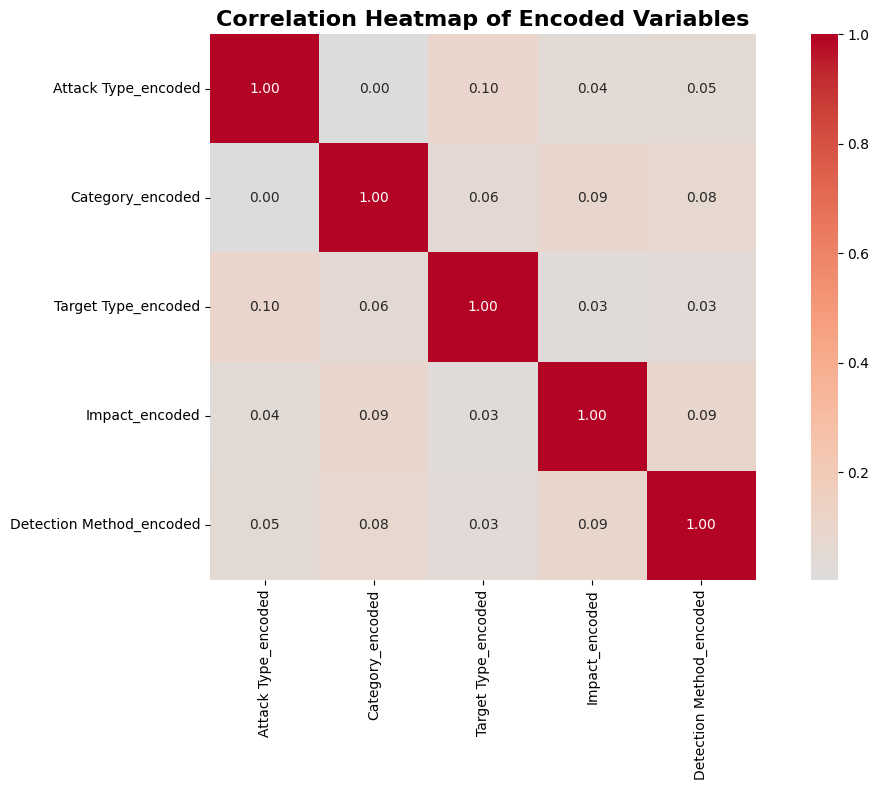

In [ ]:
# Pilih kolom numerik untuk korelasi
numeric_cols = data_encoded.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numeric_cols:
    numeric_cols.remove('ID')

if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = data_encoded[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Heatmap of Encoded Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak cukup kolom numerik (selain ID) untuk membuat heatmap korelasi.")

In [ ]:
# Cross-tabulation: Attack Type vs Target Type
if 'Attack Type' in data.columns and 'Target Type' in data.columns:
    print("📊 Cross-Tabulation: Attack Type vs Target Type (Top 10 Target Types)")

    # Get the top 10 most frequent Target Types
    top_target_types = data['Target Type'].value_counts().head(10).index.tolist()

    # Filter the data to include only the top target types
    filtered_data = data[data['Target Type'].isin(top_target_types)]

    # Create crosstab using filtered data
    crosstab = pd.crosstab(filtered_data['Attack Type'], filtered_data['Target Type'], margins=True)
    print(crosstab)

📊 Cross-Tabulation: Attack Type vs Target Type (Top 10 Target Types)
Target Type                          Android App  Endpoint  GitHub Actions  \
Attack Type                                                                  
ADS Technique                                  0         1               0   
AI Misuse Simulation                           0         0               0   
AV/EDR Tampering                               0         0               0   
Abused RDP Session                             0         0               0   
Abusing Email Auto-forwarding Rules            0         0               0   
...                                          ...       ...             ...   
Worm Propagation                               0         0               0   
YARA Matching                                  0         1               0   
YARA Matching in Disk                          0         0               0   
Zoom Exploit                                   0         0               

In [ ]:
# STEP 10: INSIGHTS & KESIMPULAN
# Deskripsi: Merangkum temuan penting dari analisis
# ===============================================

print("\n🎯 INSIGHTS DAN KESIMPULAN")
print("="*50)

insights = []

# Insight 1: Attack Type paling umum
most_common_attack = data['Attack Type'].value_counts().index[0]
attack_count = data['Attack Type'].value_counts().iloc[0]
attack_percentage = (attack_count / len(data)) * 100
insights.append(f"1. 🚨 Jenis serangan paling umum: '{most_common_attack}' ({attack_count:,} kasus, {attack_percentage:.1f}%)")

# Insight 2: Target yang paling sering diserang
if 'Target Type' in data.columns:
    most_targeted = data['Target Type'].value_counts().index[0]
    target_count = data['Target Type'].value_counts().iloc[0]
    target_percentage = (target_count / len(data)) * 100
    insights.append(f"2. 🎯 Target paling sering diserang: '{most_targeted}' ({target_count:,} kasus, {target_percentage:.1f}%)")

# Insight 3: Tools paling populer
if len(top_tools) > 0:
    most_used_tool = top_tools.index[0]
    tool_count = top_tools.iloc[0]
    insights.append(f"3. 🛠️ Tool paling sering digunakan: '{most_used_tool}' ({tool_count:,} kemunculan)")

# Insight 4: Distribusi kategori
category_diversity = len(data['Category'].unique())
insights.append(f"4. 📂 Terdapat {category_diversity} kategori serangan yang berbeda")

# Insight 5: Data quality
total_records = len(data)
complete_records = len(data.dropna())
completeness = (complete_records / total_records) * 100
insights.append(f"5. 📊 Kualitas data: {completeness:.1f}% records lengkap dari {total_records:,} total records")

# Insight 6: Title length analysis
if 'Title_length' in data.columns:
    avg_title_length = data['Title_length'].mean()
    insights.append(f"6. 📝 Rata-rata panjang judul serangan: {avg_title_length:.0f} karakter")

# Print all insights
for insight in insights:
    print(insight)

print("\n🔍 REKOMENDASI KEAMANAN BERDASARKAN ANALISIS:")
print("="*50)

recommendations = [
    "• Fokus perlindungan pada jenis serangan yang paling umum ditemukan",
    "• Perkuat keamanan untuk jenis target yang paling sering diserang",
    "• Monitor penggunaan tools yang populer di kalangan penyerang",
    "• Implementasikan deteksi berbasis pola untuk serangan yang trending",
    "• Tingkatkan awareness terhadap teknik MITRE yang sering digunakan"
]

for rec in recommendations:
    print(rec)

print("\n✅ ANALISIS EDA SELESAI!")
print("Dataset telah berhasil dianalisis dengan comprehensive insights untuk cybersecurity!")


🎯 INSIGHTS DAN KESIMPULAN
1. 🚨 Jenis serangan paling umum: 'Hardware Interface Exploitation' (161 kasus, 1.1%)
2. 🎯 Target paling sering diserang: 'Windows' (291 kasus, 2.1%)
3. 🛠️ Tool paling sering digunakan: 'Burp Suite' (1,117 kemunculan)
4. 📂 Terdapat 64 kategori serangan yang berbeda
5. 📊 Kualitas data: 100.0% records lengkap dari 14,133 total records

🔍 REKOMENDASI KEAMANAN BERDASARKAN ANALISIS:
• Fokus perlindungan pada jenis serangan yang paling umum ditemukan
• Perkuat keamanan untuk jenis target yang paling sering diserang
• Monitor penggunaan tools yang populer di kalangan penyerang
• Implementasikan deteksi berbasis pola untuk serangan yang trending
• Tingkatkan awareness terhadap teknik MITRE yang sering digunakan

✅ ANALISIS EDA SELESAI!
Dataset telah berhasil dianalisis dengan comprehensive insights untuk cybersecurity!
